# Feature Selection

# VarianceThreshold

**Step 1: Import Necessary Libraries**
-

In [526]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Step 2: Create or Load the Dataset**
-

In [529]:
df = pd.read_csv(r"C:\Users\HP\Documents\Naresh IT\Data file\winequality_red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Step 3: Splits X-y column**
-

In [532]:
X=df.drop('quality',axis=1)  # select the input columns
y=df['quality'] # select the output
df.shape,X.shape,y.shape

((1599, 12), (1599, 11), (1599,))

**Apply Variance Threshold**
-

In [535]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0.3)

In [537]:

vt.fit(X)


VarianceThreshold(threshold=0.3)

In [539]:
vt.variances_


array([3.02952057e+00, 3.20423261e-02, 3.79237511e-02, 1.98665392e+00,
       2.21375732e-03, 1.09346457e+02, 1.08142564e+03, 3.55980179e-06,
       2.38202742e-02, 2.87146470e-02, 1.13493717e+00])

In [541]:
vt.get_support()


array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True])

# Feature Selection-How To Drop Features Using Pearson Correlation

In [544]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [546]:
corr = X_train.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.267924,0.679876,0.104657,0.087915,-0.168020,-0.108836,0.669151,-0.680823,0.183105,-0.046890
volatile acidity,-0.267924,1.000000,-0.550238,-0.017290,0.056300,-0.018207,0.054028,0.008512,0.247491,-0.280754,-0.202691
citric acid,0.679876,-0.550238,1.000000,0.148050,0.188716,-0.074663,0.047871,0.378511,-0.537238,0.300356,0.109209
residual sugar,0.104657,-0.017290,0.148050,1.000000,0.027555,0.177538,0.201606,0.332520,-0.077903,-0.014920,0.065280
chlorides,0.087915,0.056300,0.188716,0.027555,1.000000,-0.016669,0.031555,0.190066,-0.245936,0.335765,-0.223375
free sulfur dioxide,-0.168020,-0.018207,-0.074663,0.177538,-0.016669,1.000000,0.661843,-0.049243,0.082737,0.045379,-0.062984
total sulfur dioxide,-0.108836,0.054028,0.047871,0.201606,0.031555,0.661843,1.000000,0.059614,-0.084805,0.038650,-0.216920
density,0.669151,0.008512,0.378511,0.332520,0.190066,-0.049243,0.059614,1.000000,-0.339992,0.144517,-0.484069
pH,-0.680823,0.247491,-0.537238,-0.077903,-0.245936,0.082737,-0.084805,-0.339992,1.000000,-0.191850,0.198440
sulphates,0.183105,-0.280754,0.300356,-0.014920,0.335765,0.045379,0.038650,0.144517,-0.191850,1.000000,0.077062


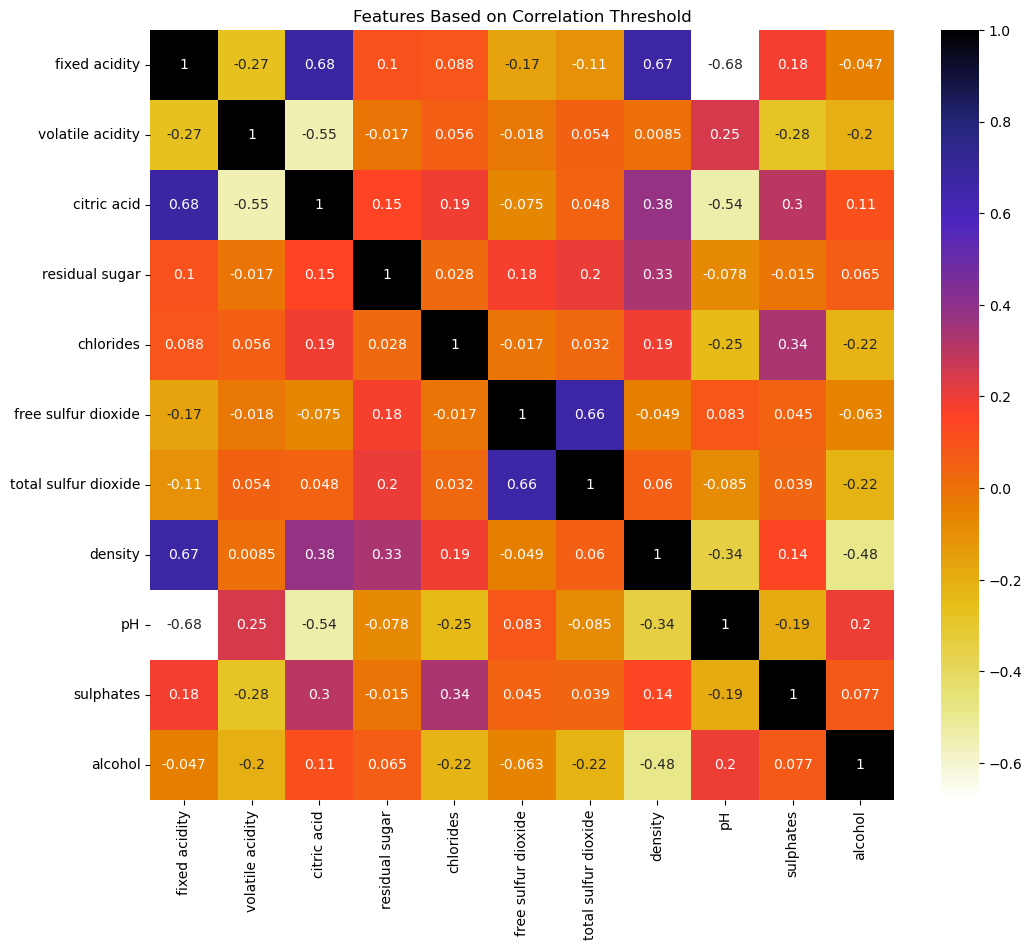

In [548]:
plt.figure(figsize=(12,10))
plt.title('Features Based on Correlation Threshold')
sns.heatmap(corr,annot=True, cmap=plt.cm.CMRmap_r)
plt.savefig('Features Based on Correlation Threshold.png')
plt.show()

In [550]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_mateix = dataset.corr()
    for i in range(len(corr_mateix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_mateix.columns[i]
                col_corr.add(colname)
    return col_corr

In [552]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))
corr_features

set()

In [554]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
...,...,...,...,...,...,...,...,...,...,...,...
351,9.1,0.795,0.00,2.6,0.096,11.0,26.0,0.99940,3.35,0.83,9.4
415,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3
564,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5


**Select Features Using Information Gain**
-

it is a method of selecting the most relevent features for a model by meansuring how much each feature contributes to the target variable

In [558]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\HP\Documents\Naresh IT\Data file\winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [560]:
df['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [567]:
X=df.drop('quality',axis=1)  # select the input columns
y=df['quality'] # select the output
df.shape,X.shape,y.shape

((1599, 12), (1599, 11), (1599,))

In [569]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [571]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.04846914, 0.14095619, 0.05092167, 0.03110906, 0.05635836,
       0.03748618, 0.07452345, 0.09033489, 0.01726703, 0.11533924,
       0.15444002])

In [573]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

alcohol                 0.154440
volatile acidity        0.140956
sulphates               0.115339
density                 0.090335
total sulfur dioxide    0.074523
chlorides               0.056358
citric acid             0.050922
fixed acidity           0.048469
free sulfur dioxide     0.037486
residual sugar          0.031109
pH                      0.017267
dtype: float64

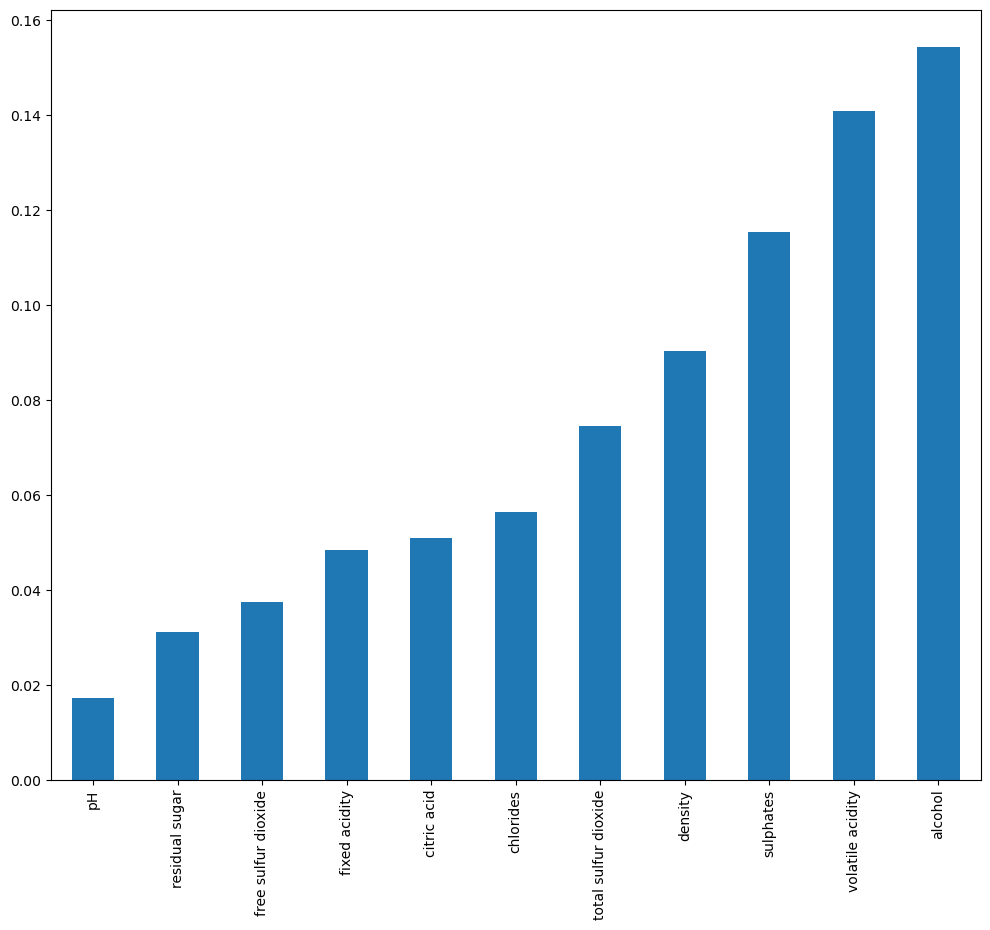

In [575]:
mutual_info.sort_values(ascending=True).plot.bar(figsize=(12,10))
plt.savefig('Information Gain.png')


**SelectKBest**
-

In [578]:
from sklearn.feature_selection import SelectKBest


In [580]:
sel_five_cols = SelectKBest(mutual_info_classif, k = 5)
sel_five_cols.fit(X_train.fillna(0),y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['volatile acidity', 'chlorides', 'density', 'sulphates', 'alcohol'], dtype='object')

Feature Selection-Perform Feature Selection Using Information Gain For Regression In ML
-

In [583]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\HP\Documents\Naresh IT\Data file\winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [587]:

numeric_lst=list(df.select_dtypes(exclude='object').columns)

In [589]:
numeric_lst

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [591]:
X=df.drop('quality',axis=1)  # select the input columns
y=df['quality'] # select the output
df.shape,X.shape,y.shape

((1599, 12), (1599, 11), (1599,))

In [593]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [595]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
441,11.9,0.40,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3
227,9.0,0.82,0.14,2.60,0.089,9.0,23.0,0.99840,3.39,0.63,9.8
1386,7.4,0.64,0.07,1.80,0.100,8.0,23.0,0.99610,3.30,0.58,9.6
1245,7.4,0.55,0.19,1.80,0.082,15.0,34.0,0.99655,3.49,0.68,10.5
60,8.8,0.40,0.40,2.20,0.079,19.0,52.0,0.99800,3.44,0.64,9.2
...,...,...,...,...,...,...,...,...,...,...,...
1228,5.1,0.42,0.00,1.80,0.044,18.0,88.0,0.99157,3.68,0.73,13.6
1077,8.6,0.37,0.65,6.40,0.080,3.0,8.0,0.99817,3.27,0.58,11.0
1318,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8
723,7.1,0.31,0.30,2.20,0.053,36.0,127.0,0.99650,2.94,1.62,9.5


In [597]:
X_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [599]:
from sklearn.feature_selection import mutual_info_regression
mutual_regr = mutual_info_regression(X_train.fillna(0),y_train)
mutual_regr

array([0.0416753 , 0.1388615 , 0.05116235, 0.00617849, 0.05656146,
       0.0246472 , 0.08607223, 0.09446549, 0.05667224, 0.10660919,
       0.1670758 ])

In [601]:
mutual_regr = pd.Series(mutual_regr)
mutual_regr.index = X_train.columns
mutual_regr.sort_values(ascending=False)

alcohol                 0.167076
volatile acidity        0.138861
sulphates               0.106609
density                 0.094465
total sulfur dioxide    0.086072
pH                      0.056672
chlorides               0.056561
citric acid             0.051162
fixed acidity           0.041675
free sulfur dioxide     0.024647
residual sugar          0.006178
dtype: float64

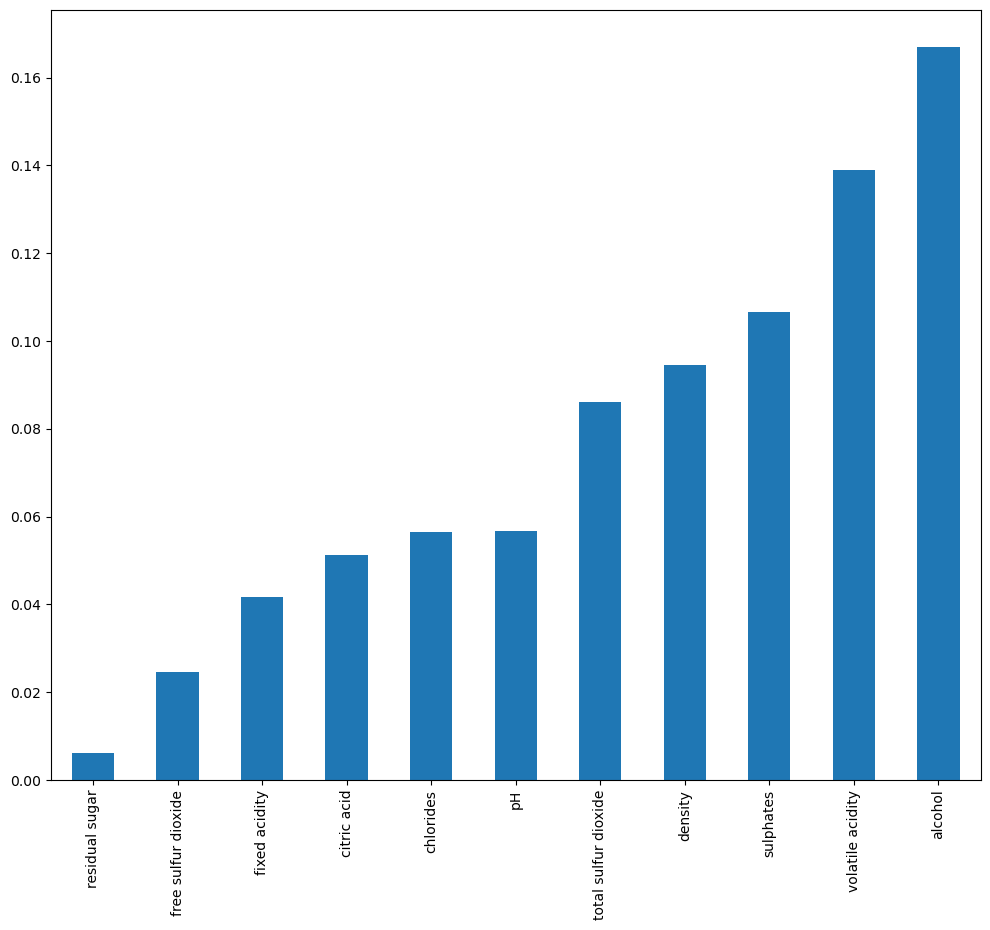

In [603]:
mutual_regr.sort_values(ascending=True).plot.bar(figsize=(12,10))
plt.savefig('Information Gain For Regression.png')
